In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Dataset

In [40]:
df = pd.read_csv('customerchurn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [42]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

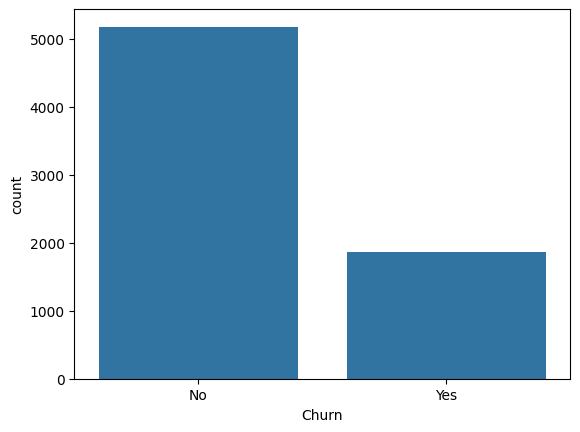

In [43]:
sns.countplot(x='Churn', data=df)

### Data Preprocessing

In [44]:
# Data Preprocessing
df.drop('customerID', axis=1, inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Encoding the categorical columns

In [45]:
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])
df

C:\Users\mknay\AppData\Local\Temp\ipykernel_11192\3677020480.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
C:\Users\mknay\AppData\Local\Temp\ipykernel_11192\3677020480.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
C:\Users\mknay\AppData\Local\Temp\ipykernel_11192\3677020480.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
C:\Users\mknay\AppData\Local\Temp\ipykernel_11192\3677020480.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype ==

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [46]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


### Using the Original Dataframe

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Churn',axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state=42)


In [48]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression,Random Forest and Gradient Boosting Models

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [50]:
y_pred = lr.predict(X_test)

print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Classification Report:\n',classification_report(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

Accuracy Score: 0.8086314593980692
Confusion Matrix:
 [[1162  120]
 [ 217  262]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1282
           1       0.69      0.55      0.61       479

    accuracy                           0.81      1761
   macro avg       0.76      0.73      0.74      1761
weighted avg       0.80      0.81      0.80      1761

ROC AUC Score: 0.7266845579877476


In [51]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
y_pred = rf.predict(X_test)

print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Classification Report:\n',classification_report(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

Accuracy Score: 0.7921635434412265
Confusion Matrix:
 [[1174  108]
 [ 258  221]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1282
           1       0.67      0.46      0.55       479

    accuracy                           0.79      1761
   macro avg       0.75      0.69      0.71      1761
weighted avg       0.78      0.79      0.78      1761

ROC AUC Score: 0.6885672504144423


In [53]:

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)


GradientBoostingClassifier()

In [54]:
y_pred = gb.predict(X_test)

print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Classification Report:\n',classification_report(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

Accuracy Score: 0.80465644520159
Confusion Matrix:
 [[1177  105]
 [ 239  240]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1282
           1       0.70      0.50      0.58       479

    accuracy                           0.80      1761
   macro avg       0.76      0.71      0.73      1761
weighted avg       0.79      0.80      0.79      1761

ROC AUC Score: 0.7095702826025359


In [55]:
#using XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [56]:
y_pred = xgb.predict(X_test)

print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Classification Report:\n',classification_report(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

Accuracy Score: 0.7904599659284497
Confusion Matrix:
 [[1141  141]
 [ 228  251]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1282
           1       0.64      0.52      0.58       479

    accuracy                           0.79      1761
   macro avg       0.74      0.71      0.72      1761
weighted avg       0.78      0.79      0.78      1761

ROC AUC Score: 0.707011975677357


### Undersampling using Random Under Sampler

In [57]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

### Logistic Regression,Random Forest and Gradient Boosting Models

In [58]:
lr.fit(X_rus, y_rus)

LogisticRegression()

In [59]:
y_pred = lr.predict(X_test)

print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Classification Report:\n',classification_report(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

Accuracy Score: 0.7620670073821693
Confusion Matrix:
 [[943 339]
 [ 80 399]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.74      0.82      1282
           1       0.54      0.83      0.66       479

    accuracy                           0.76      1761
   macro avg       0.73      0.78      0.74      1761
weighted avg       0.82      0.76      0.77      1761

ROC AUC Score: 0.7842774044991027


In [60]:
rf.fit(X_rus, y_rus)

RandomForestClassifier()

In [61]:
y_pred = rf.predict(X_test)

print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Classification Report:\n',classification_report(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

Accuracy Score: 0.7518455423055083
Confusion Matrix:
 [[942 340]
 [ 97 382]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      1282
           1       0.53      0.80      0.64       479

    accuracy                           0.75      1761
   macro avg       0.72      0.77      0.72      1761
weighted avg       0.80      0.75      0.76      1761

ROC AUC Score: 0.7661420861844912


In [62]:
gb.fit(X_rus, y_rus)

GradientBoostingClassifier()

In [63]:
y_pred = gb.predict(X_test)

print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Classification Report:\n',classification_report(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

Accuracy Score: 0.7484383872799546
Confusion Matrix:
 [[920 362]
 [ 81 398]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.72      0.81      1282
           1       0.52      0.83      0.64       479

    accuracy                           0.75      1761
   macro avg       0.72      0.77      0.72      1761
weighted avg       0.81      0.75      0.76      1761

ROC AUC Score: 0.7742632043486334


In [64]:
xgb.fit(X_rus, y_rus)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [65]:
y_pred = xgb.predict(X_test)

print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Classification Report:\n',classification_report(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

Accuracy Score: 0.727427597955707
Confusion Matrix:
 [[909 373]
 [107 372]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.71      0.79      1282
           1       0.50      0.78      0.61       479

    accuracy                           0.73      1761
   macro avg       0.70      0.74      0.70      1761
weighted avg       0.79      0.73      0.74      1761

ROC AUC Score: 0.7428331580027293


### Oversampling using SMOTE

In [66]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train, y_train)

### Logistic Regression,Random Forest and Gradient Boosting Models

In [67]:
lr.fit(X_smote, y_smote)

LogisticRegression()

In [68]:
y_pred = lr.predict(X_test)

print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Classification Report:\n',classification_report(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

Accuracy Score: 0.7603634298693924
Confusion Matrix:
 [[949 333]
 [ 89 390]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.74      0.82      1282
           1       0.54      0.81      0.65       479

    accuracy                           0.76      1761
   macro avg       0.73      0.78      0.73      1761
weighted avg       0.81      0.76      0.77      1761

ROC AUC Score: 0.7772229260777948


In [69]:
rf.fit(X_smote, y_smote)

RandomForestClassifier()

In [70]:
y_pred = rf.predict(X_test)

print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Classification Report:\n',classification_report(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

Accuracy Score: 0.7825099375354913
Confusion Matrix:
 [[1106  176]
 [ 207  272]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1282
           1       0.61      0.57      0.59       479

    accuracy                           0.78      1761
   macro avg       0.72      0.72      0.72      1761
weighted avg       0.78      0.78      0.78      1761

ROC AUC Score: 0.7152820977139711


In [71]:
gb.fit(X_rus, y_rus)

GradientBoostingClassifier()

In [72]:
y_pred = gb.predict(X_test)

print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Classification Report:\n',classification_report(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

Accuracy Score: 0.7484383872799546
Confusion Matrix:
 [[920 362]
 [ 81 398]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.72      0.81      1282
           1       0.52      0.83      0.64       479

    accuracy                           0.75      1761
   macro avg       0.72      0.77      0.72      1761
weighted avg       0.81      0.75      0.76      1761

ROC AUC Score: 0.7742632043486334


In [73]:
xgb.fit(X_rus, y_rus)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [74]:
y_pred = xgb.predict(X_test)

print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Classification Report:\n',classification_report(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

Accuracy Score: 0.727427597955707
Confusion Matrix:
 [[909 373]
 [107 372]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.71      0.79      1282
           1       0.50      0.78      0.61       479

    accuracy                           0.73      1761
   macro avg       0.70      0.74      0.70      1761
weighted avg       0.79      0.73      0.74      1761

ROC AUC Score: 0.7428331580027293
